Importing Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(color_codes=True)

Data Importing

In [6]:
df= pd.read_csv("churn_data_modeling.csv")
df["date_activ"]= pd.to_datetime(df["date_activ"], format="%Y-%m-%d")
df["date_end"]= pd.to_datetime(df["date_end"], format="%Y-%m-%d")
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')
     

In [7]:
df.head()

Unnamed: 0                                id   
0           0  24011ae4ebbe3035111d65fa7c15bc57  \
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month   
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0  \
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...   
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...  \
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_year_price_off_peak_var  mean_year_price_peak_var   
0                      0.131756                  0.092638  \
1                      0.147600                  0.000000   
2                      0.167798                  0.088409   
3                      0.148586                  0.000000   
4                      0.119906                  0.101673   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix   
0                      0.036909                     42.497907  \
1                      0.000000                     44.444710   
2                      0.000000                     44.444710   
3                      0.000000                     44.444710   
4                      0.073719                     40.728885   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix   
0                 12.218665                      8.145777  \
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.437330                     16.291555   

   mean_year_price_off_peak mean_year_price_peak  mean_year_price_med_peak   
0                 42.629663            12.311304                  8.182687  \
1                 44.592310             0.000000                  0.000000   
2                 44.612508             0.088409                  0.000000   
3                 44.593296             0.000000                  0.000000   
4                 40.848791            24.539003                 16.365274   

   churn  
0      1  
1      0  
2      0  
3      0  
4      0  

[5 rows x 54 columns]

In [21]:
df

Unnamed: 0                                id   
0               0  24011ae4ebbe3035111d65fa7c15bc57  \
1               1  d29c2c54acc38ff3c0614d0a653813dd   
2               2  764c75f661154dac3a6c254cd082ea7d   
3               3  bba03439a292a1e166f80264c16191cb   
4               4  149d57cf92fc41cf94415803a877cb4b   
...           ...                               ...   
14600       14600  18463073fb097fc0ac5d3e040f356987   
14601       14601  d0a6f71671571ed83b2645d23af6de00   
14602       14602  10e6828ddd62cbcf687cb74928c4c2d2   
14603       14603  1cf20fd6206d7678d5bcafd28c53b4db   
14604       14604  563dde550fd624d7352f3de77c0cdfcd   

                          channel_sales  cons_12m  cons_gas_12m   
0      foosdfpfkusacimwkcsosbicdxkicaua         0         54946  \
1                               MISSING      4660             0   
2      foosdfpfkusacimwkcsosbicdxkicaua       544             0   
3      lmkebamcaaclubfxadlmueccxoimlema      1584             0   
4                               MISSING      4425             0   
...                                 ...       ...           ...   
14600  foosdfpfkusacimwkcsosbicdxkicaua     32270         47940   
14601  foosdfpfkusacimwkcsosbicdxkicaua      7223             0   
14602  foosdfpfkusacimwkcsosbicdxkicaua      1844             0   
14603  foosdfpfkusacimwkcsosbicdxkicaua       131             0   
14604                           MISSING      8730             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal   
0                    0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  \
1                    0 2009-08-21 2016-08-30      2009-08-21   2015-08-31   
2                    0 2010-04-16 2016-04-16      2010-04-16   2015-04-17   
3                    0 2010-03-30 2016-03-30      2010-03-30   2015-03-31   
4                  526 2010-01-13 2016-03-07      2010-01-13   2015-03-09   
...                ...        ...        ...             ...          ...   
14600                0 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14601              181 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14602              179 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14603                0 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14604                0 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       ...  mean_year_price_med_peak  churn  offpeak_diff_dec_january_energy   
0      ...                  8.182687      1                         0.020057  \
1      ...                  0.000000      0                        -0.003767   
2      ...                  0.000000      0                        -0.004670   
3      ...                  0.000000      0                        -0.004547   
4      ...                 16.365274      0                        -0.006192   
...    ...                       ...    ...                              ...   
14600  ...                  0.000000      0                        -0.008653   
14601  ...                  8.438721      1                        -0.007395   
14602  ...                 16.365274      1                        -0.006192   
14603  ...                  0.000000      0                        -0.003767   
14604  ...                  0.000000      0                        -0.004628   

       offpeak_diff_dec_january_power  off_peak_peak_var_max_monthly_diff   
0                            3.700961                            0.060550  \
1                            0.177779                            0.151367   
2                            0.177779                            0.084587   
3                            0.177779                            0.153133   
4                            0.162916                            0.022225   
...                               ...                                 ...   
14600                        0.177779                            0.148825   
14601                        0.236694  

Feature Engineering

In [8]:
price_df = pd.read_csv("price_data.csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var   
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367  \
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix   
0             0.0                 0.0           44.266931             0.0  \
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [19]:
price_df.head(200)

id price_date  price_off_peak_var   
0    038af19179925da21a25619c5a24b745 2015-01-01            0.151367  \
1    038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2    038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3    038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4    038af19179925da21a25619c5a24b745 2015-05-01            0.149626   
..                                ...        ...                 ...   
195  724535a881cb47ffb40c264738946a86 2015-04-01            0.168363   
196  724535a881cb47ffb40c264738946a86 2015-05-01            0.168363   
197  724535a881cb47ffb40c264738946a86 2015-06-01            0.168363   
198  724535a881cb47ffb40c264738946a86 2015-07-01            0.168363   
199  724535a881cb47ffb40c264738946a86 2015-08-01            0.163735   

     price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix   
0          0.000000                 0.0           44.266931             0.0  \
1          0.000000                 0.0           44.266931             0.0   
2          0.000000                 0.0           44.266931             0.0   
3          0.000000                 0.0           44.266931             0.0   
4          0.000000                 0.0           44.266931             0.0   
..              ...                 ...                 ...             ...   
195        0.085100                 0.0           44.444710             0.0   
196        0.085100                 0.0           44.444710             0.0   
197        0.085100                 0.0           44.444710             0.0   
198        0.085100                 0.0           44.444710             0.0   
199        0.084347                 0.0           44.444710             0.0   

     price_mid_peak_fix  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
..                  ...  
195                 0.0  
196                 0.0  
197                 0.0  
198                 0.0  
199                 0.0  

[200 rows x 8 columns]

In [9]:
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy   
0  0002203ffbb812588b632b9e628cc38d                        -0.006192  \
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [10]:

df = pd.merge(df, diff, on='id')
df.head()

Unnamed: 0                                id   
0           0  24011ae4ebbe3035111d65fa7c15bc57  \
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month   
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0  \
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...   
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...  \
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix   
0                      0.036909                     42.497907  \
1                      0.000000                     44.444710   
2                      0.000000                     44.444710   
3                      0.000000                     44.444710   
4                      0.073719                     40.728885   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix   
0                 12.218665                      8.145777  \
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.437330                     16.291555   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_med_peak   
0                 42.629663             12.311304                  8.182687  \
1                 44.592310              0.000000                  0.000000   
2                 44.612508              0.088409                  0.000000   
3                 44.593296              0.000000                  0.000000   
4                 40.848791             24.539003                 16.365274   

  churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0     1                         0.020057                        3.700961  
1     0                        -0.003767                        0.177779  
2     0                        -0.004670                        0.177779  
3     0                        -0.004547                        0.177779  
4     0                        -0.006192                        0.162916  

[5 rows x 56 columns]

In [11]:
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [12]:
mean_prices_by_month

id price_date  price_off_peak_var   
0       0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098  \
1       0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2       0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3       0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4       0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   
...                                  ...        ...                 ...   
192997  ffff7fa066f1fb305ae285bb03bf325a 2015-08-01            0.119916   
192998  ffff7fa066f1fb305ae285bb03bf325a 2015-09-01            0.119916   
192999  ffff7fa066f1fb305ae285bb03bf325a 2015-10-01            0.119916   
193000  ffff7fa066f1fb305ae285bb03bf325a 2015-11-01            0.119916   
193001  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix   
0             0.103975            0.070232           40.565969  \
1             0.103975            0.070232           40.565969   
2             0.105842            0.073773           40.728885   
3             0.105842            0.073773           40.728885   
4             0.105842            0.073773           40.728885   
...                ...                 ...                 ...   
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  
0            24.339581           16.226389  
1            24.339581           16.226389  
2            24.437330           16.291555  
3            24.437330           16.291555  
4            24.437330           16.291555  
...                ...                 ...  
192997       24.437330           16.291555  
192998       24.437330           16.291555  
192999       24.437330           16.291555  
193000       24.437330           16.291555  
193001       24.437330           16.291555  

[193002 rows x 8 columns]

In [13]:
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
     

In [14]:
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)
     

In [15]:

columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

Unnamed: 0                                id   
0           0  24011ae4ebbe3035111d65fa7c15bc57  \
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month   
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0  \
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...   
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...  \
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_year_price_med_peak  churn  offpeak_diff_dec_january_energy   
0                  8.182687      1                         0.020057  \
1                  0.000000      0                        -0.003767   
2                  0.000000      0                        -0.004670   
3                  0.000000      0                        -0.004547   
4                 16.365274      0                        -0.006192   

   offpeak_diff_dec_january_power  off_peak_peak_var_max_monthly_diff   
0                        3.700961                            0.060550  \
1                        0.177779                            0.151367   
2                        0.177779                            0.084587   
3                        0.177779                            0.153133   
4                        0.162916                            0.022225   

   peak_mid_peak_var_max_monthly_diff  off_peak_mid_peak_var_max_monthly_diff   
0                            0.085483                                0.146033  \
1                            0.085483                                0.151367   
2                            0.089162                                0.172468   
3                            0.000000                                0.153133   
4                            0.033743                                0.055866   

  off_peak_peak_fix_max_monthly_diff  peak_mid_peak_fix_max_monthly_diff   
0                          44.266930                            8.145775  \
1                          44.444710                            0.000000   
2                          44.444710                            0.000000   
3                          44.444710                            0.000000   
4                          16.291555                            8.145775   

   off_peak_mid_peak_fix_max_monthly_diff  
0                                44.26693  
1                                44.44471  
2                                44.44471  
3                                44.44471  
4                                24.43733  

[5 rows x 62 columns]

In [20]:
df

Unnamed: 0                                id   
0               0  24011ae4ebbe3035111d65fa7c15bc57  \
1               1  d29c2c54acc38ff3c0614d0a653813dd   
2               2  764c75f661154dac3a6c254cd082ea7d   
3               3  bba03439a292a1e166f80264c16191cb   
4               4  149d57cf92fc41cf94415803a877cb4b   
...           ...                               ...   
14600       14600  18463073fb097fc0ac5d3e040f356987   
14601       14601  d0a6f71671571ed83b2645d23af6de00   
14602       14602  10e6828ddd62cbcf687cb74928c4c2d2   
14603       14603  1cf20fd6206d7678d5bcafd28c53b4db   
14604       14604  563dde550fd624d7352f3de77c0cdfcd   

                          channel_sales  cons_12m  cons_gas_12m   
0      foosdfpfkusacimwkcsosbicdxkicaua         0         54946  \
1                               MISSING      4660             0   
2      foosdfpfkusacimwkcsosbicdxkicaua       544             0   
3      lmkebamcaaclubfxadlmueccxoimlema      1584             0   
4                               MISSING      4425             0   
...                                 ...       ...           ...   
14600  foosdfpfkusacimwkcsosbicdxkicaua     32270         47940   
14601  foosdfpfkusacimwkcsosbicdxkicaua      7223             0   
14602  foosdfpfkusacimwkcsosbicdxkicaua      1844             0   
14603  foosdfpfkusacimwkcsosbicdxkicaua       131             0   
14604                           MISSING      8730             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal   
0                    0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  \
1                    0 2009-08-21 2016-08-30      2009-08-21   2015-08-31   
2                    0 2010-04-16 2016-04-16      2010-04-16   2015-04-17   
3                    0 2010-03-30 2016-03-30      2010-03-30   2015-03-31   
4                  526 2010-01-13 2016-03-07      2010-01-13   2015-03-09   
...                ...        ...        ...             ...          ...   
14600                0 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14601              181 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14602              179 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14603                0 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14604                0 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       ...  mean_year_price_med_peak  churn  offpeak_diff_dec_january_energy   
0      ...                  8.182687      1                         0.020057  \
1      ...                  0.000000      0                        -0.003767   
2      ...                  0.000000      0                        -0.004670   
3      ...                  0.000000      0                        -0.004547   
4      ...                 16.365274      0                        -0.006192   
...    ...                       ...    ...                              ...   
14600  ...                  0.000000      0                        -0.008653   
14601  ...                  8.438721      1                        -0.007395   
14602  ...                 16.365274      1                        -0.006192   
14603  ...                  0.000000      0                        -0.003767   
14604  ...                  0.000000      0                        -0.004628   

       offpeak_diff_dec_january_power  off_peak_peak_var_max_monthly_diff   
0                            3.700961                            0.060550  \
1                            0.177779                            0.151367   
2                            0.177779                            0.084587   
3                            0.177779                            0.153133   
4                            0.162916                            0.022225   
...                               ...                                 ...   
14600                        0.177779                            0.148825   
14601                        0.236694  

In [22]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
2       0.176471
3       0.143987
4       0.127473
13      0.095238
5       0.091999
12      0.083333
7       0.075472
6       0.075407
11      0.059783
8       0.047244
10      0.045455
9       0.012500

In [23]:

def convert_months(reference_date, df, column):
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

reference_date = datetime(2016, 1, 1)

df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')
     
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id   
0           0  24011ae4ebbe3035111d65fa7c15bc57  \
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month   
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0  \
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy   
0               0.00                   0                       0.0  \
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  ...  peak_mid_peak_var_max_monthly_diff   
0                     1.78  ...                            0.085483  \
1                    16.27  ...                            0.085483   
2                    38.72  ...                            0.089162   
3                    19.83  ...                            0.000000   
4                   131.73  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff   
0                                0.146033                           44.266930  \
1                                0.151367                           44.444710   
2                                0.172468                           44.444710   
3                                0.153133                           44.444710   
4                                0.055866                           16.291555   

  peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff   
0                           8.145775                                44.26693  \
1                           0.000000                                44.44471   
2                           0.000000                                44.44471   
3                           0.000000                                44.44471   
4                           8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  
0       3            30              5                  1               6  
1       7            74              7                 74               3  
2       6            67              3                 67               8  
3       6            67              2                 67               8  
4       6            70              2                 70               9  

[5 rows x 63 columns]

In [24]:

df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

In [25]:

df['channel_sales'] = df['channel_sales'].astype('category')

df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [26]:

df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m   
0           0  24011ae4ebbe3035111d65fa7c15bc57         0         54946  \
1           1  d29c2c54acc38ff3c0614d0a653813dd      4660             0   
2           2  764c75f661154dac3a6c254cd082ea7d       544             0   
3           3  bba03439a292a1e166f80264c16191cb      1584             0   
4           4  149d57cf92fc41cf94415803a877cb4b      4425             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year   
0                0               0.00                   0  \
1                0             189.95                   0   
2                0              47.96                   0   
3                0             240.04                   0   
4              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m   
0                       0.0                     1.78  \
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  tenure  months_activ  months_to_end   
0                        0.114481  ...       3            30              5  \
1                        0.145711  ...       7            74              7   
2                        0.165794  ...       6            67              3   
3                        0.146694  ...       6            67              2   
4                        0.116900  ...       6            70              2   

   months_modif_prod  months_renewal  channel_MISSING   
0                  1               6            False  \
1                 74               3             True   
2                 67               8            False   
3                 67               8            False   
4                 70               9             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0                                     False  \
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                      True  \
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                     False  \
1                                     False   
2                                     False   
3                                      True   
4                                     False   

  channel_usilxuppasemubllopkaafesmlibmsdf  
0                                    False  
1                                    False  
2                                    False  
3                                    False  
4                                    False  

[5 rows x 67 columns]

In [27]:

df['origin_up'] = df['origin_up'].astype('category')

df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [28]:

df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m   
0           0  24011ae4ebbe3035111d65fa7c15bc57         0         54946  \
1           1  d29c2c54acc38ff3c0614d0a653813dd      4660             0   
2           2  764c75f661154dac3a6c254cd082ea7d       544             0   
3           3  bba03439a292a1e166f80264c16191cb      1584             0   
4           4  149d57cf92fc41cf94415803a877cb4b      4425             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year   
0                0               0.00                   0  \
1                0             189.95                   0   
2                0              47.96                   0   
3                0             240.04                   0   
4              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m   
0                       0.0                     1.78  \
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  months_modif_prod  months_renewal   
0                        0.114481  ...                  1               6  \
1                        0.145711  ...                 74               3   
2                        0.165794  ...                 67               8   
3                        0.146694  ...                 67               8   
4                        0.116900  ...                 70               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0            False                                     False  \
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                      True  \
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                     False  \
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf   
0                                     False  \
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
0                                       False  \
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci   
0                                       False  \
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 69 columns]

In [29]:

skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000  \
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m   
count        14605.000000              14605.000000             14605.000000  \
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak   
count                    14605.000000                14605.000000  \
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [30]:
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [31]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
count  14605.000000  14605.000000     14605.000000       14605.000000  \
mean       4.223945      0.778978         2.264801           2.962162   
std        0.884545      1.716828         1.769266           0.683612   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753966      0.000000         0.000000           2.695464   
50%        4.149742      0.000000         2.899821           3.046733   
75%        4.610287      0.000000         3.529430           3.380803   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m   
count        14605.000000              14605.000000             14605.000000  \
mean             1.784733                  0.966450                 1.517233   
std              1.584972                  5.108355                 0.571489   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296665   
75%              3.242293                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak   
count                    14605.000000                14605.000000  \
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Data Visualization

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24156\2384921388.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_24156\2384921388.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12

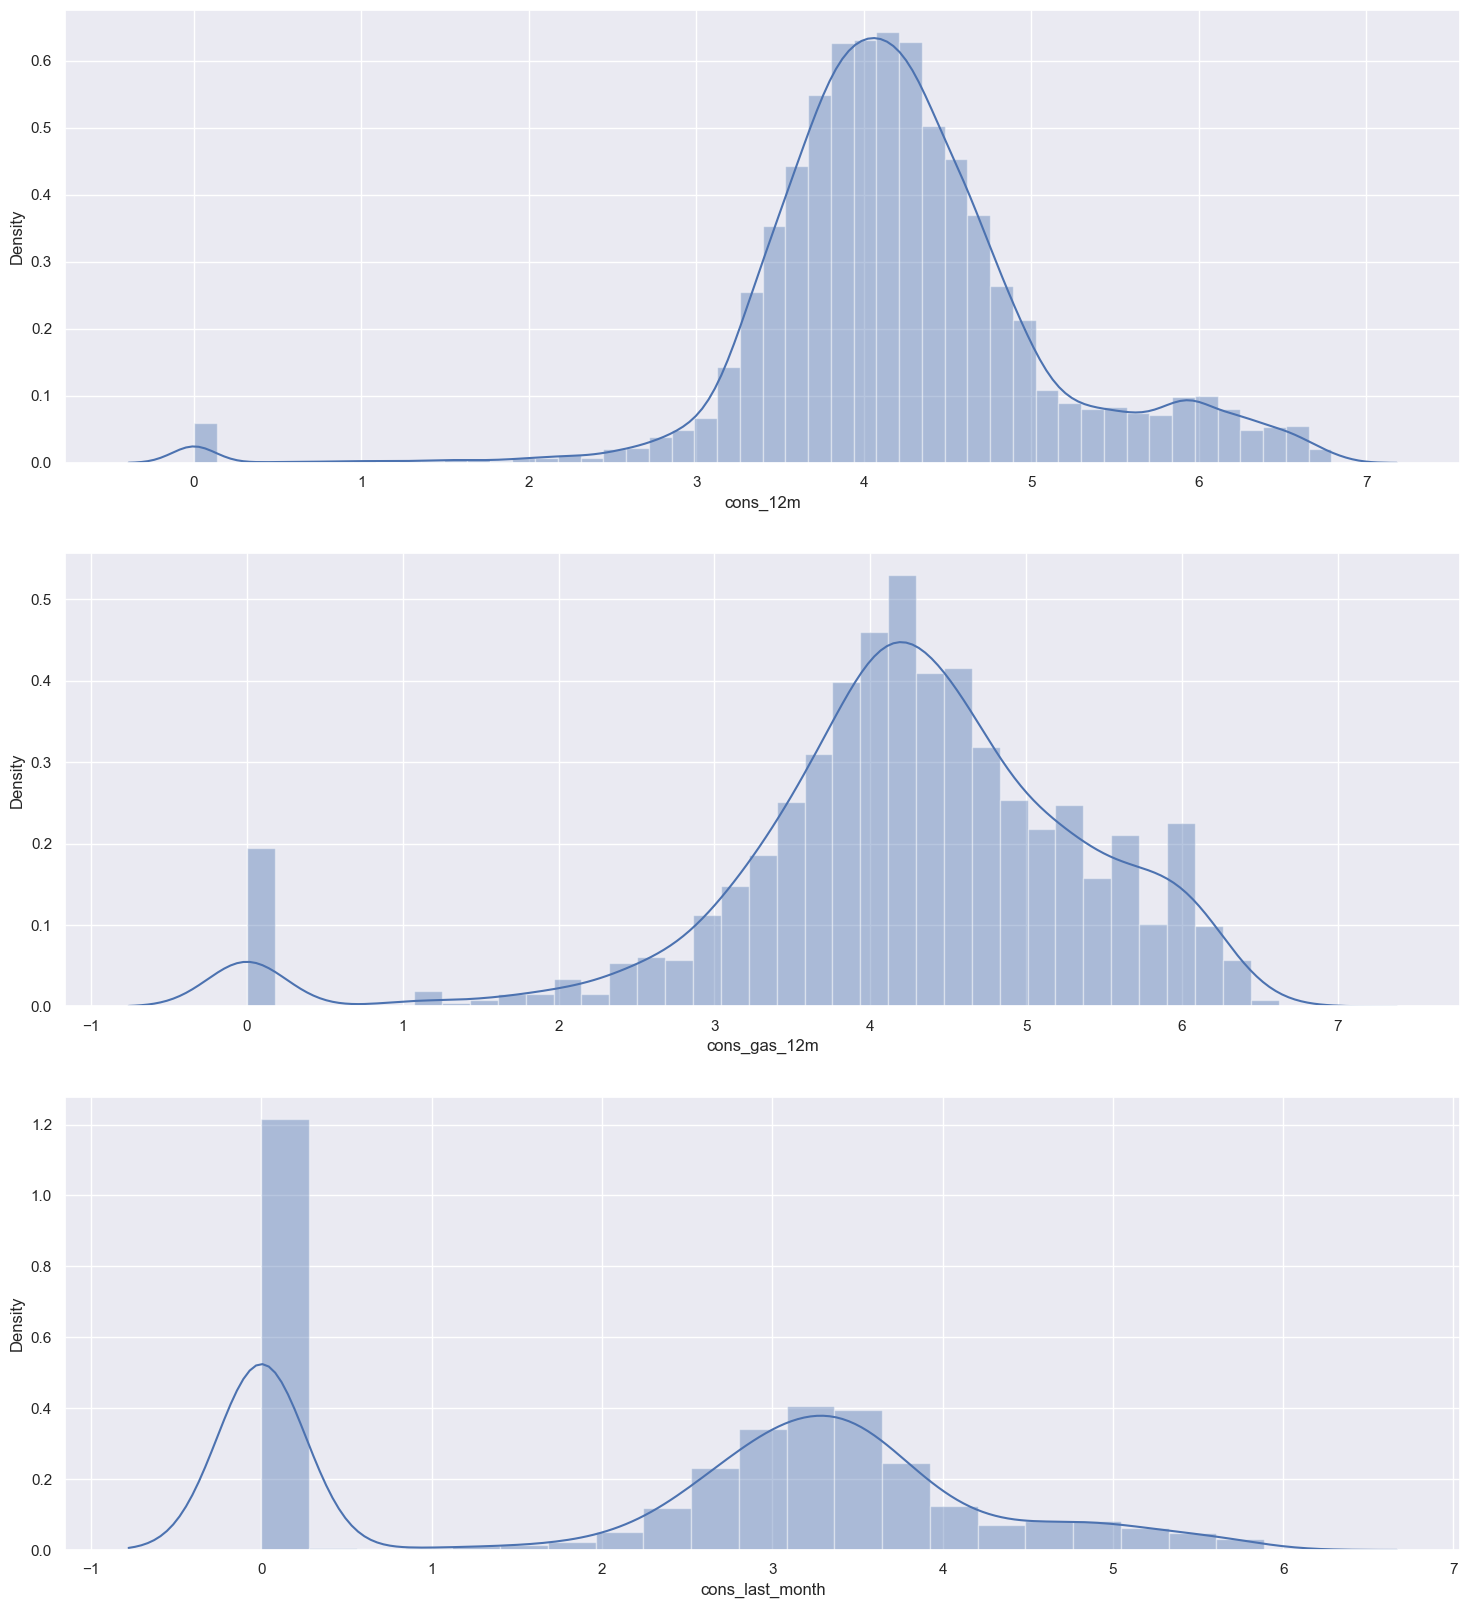

In [32]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

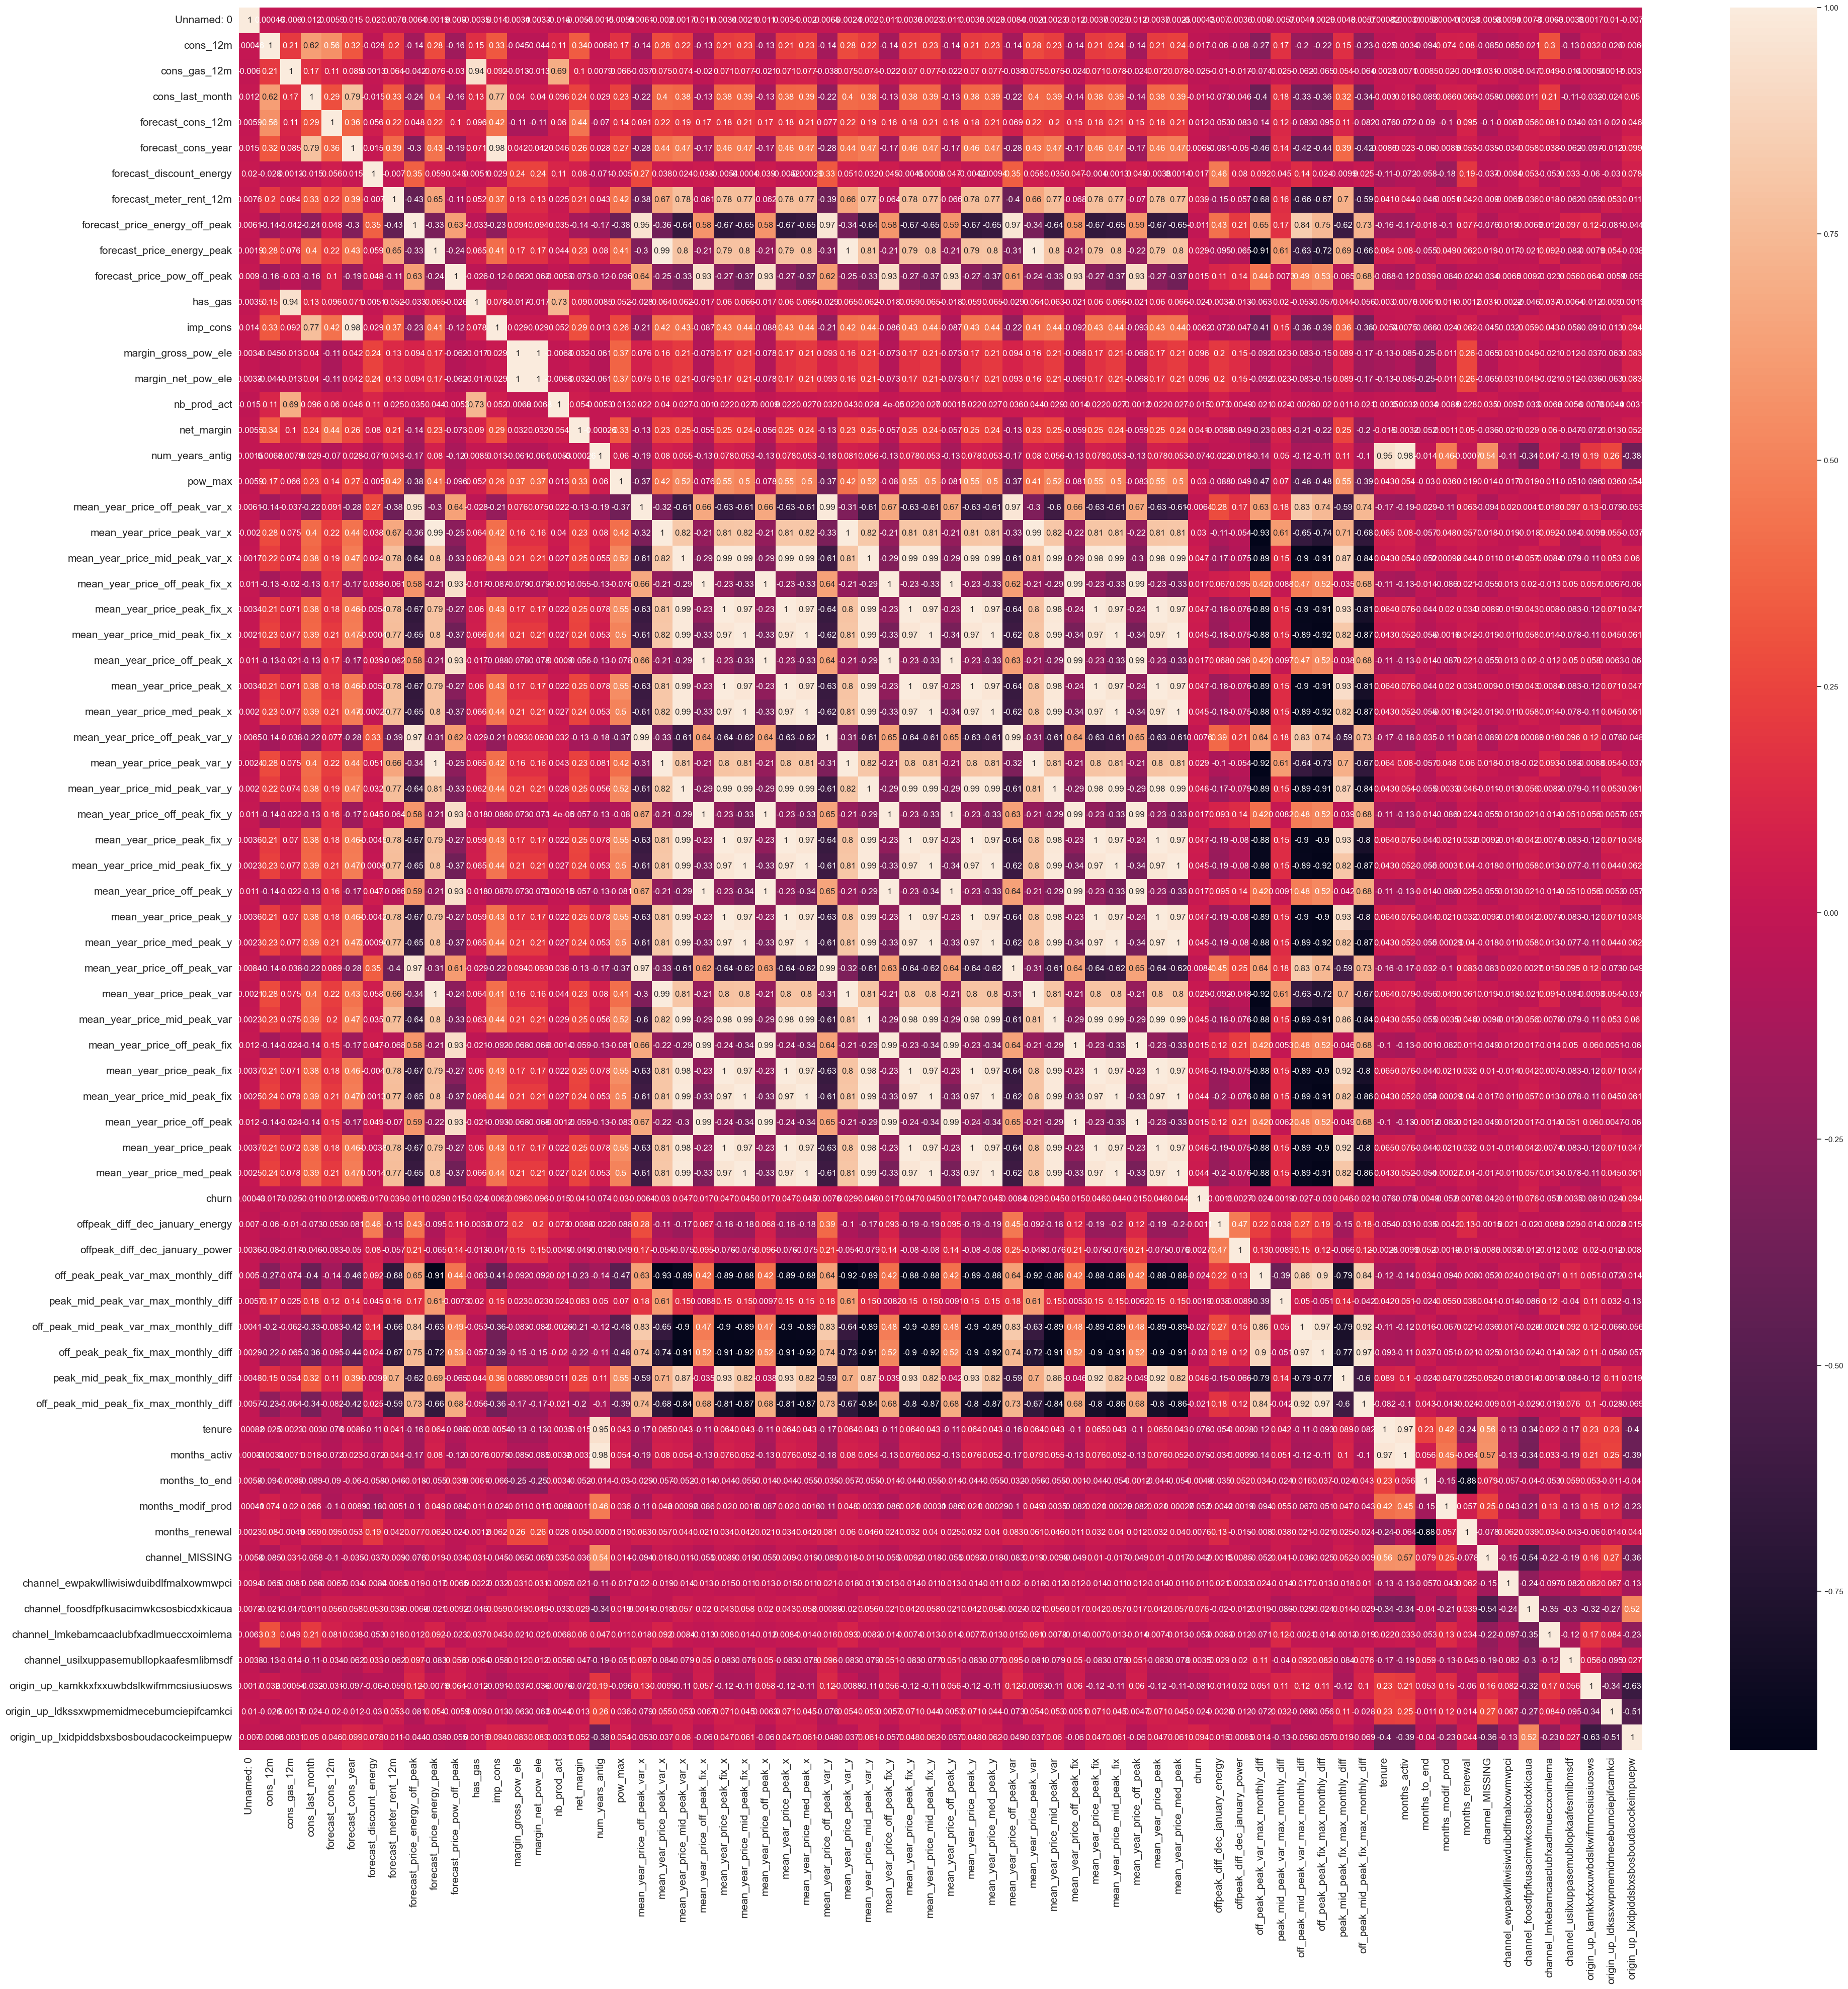

In [33]:
correlation = df.corr(numeric_only=True)
     
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Data Splitting

In [34]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [35]:

train_df = df.copy()

y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14605, 67)
(14605,)


In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 67)
(10953,)
(3652, 67)
(3652,)


Model Training

In [37]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [38]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [39]:

y_test.value_counts()

churn
0    3279
1     373
Name: count, dtype: int64

In [40]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 18
False positives: 0
True negatives: 3279
False negatives: 355

Accuracy: 0.9027929901423878
Precision: 1.0
Recall: 0.04825737265415549


Model Evaluation

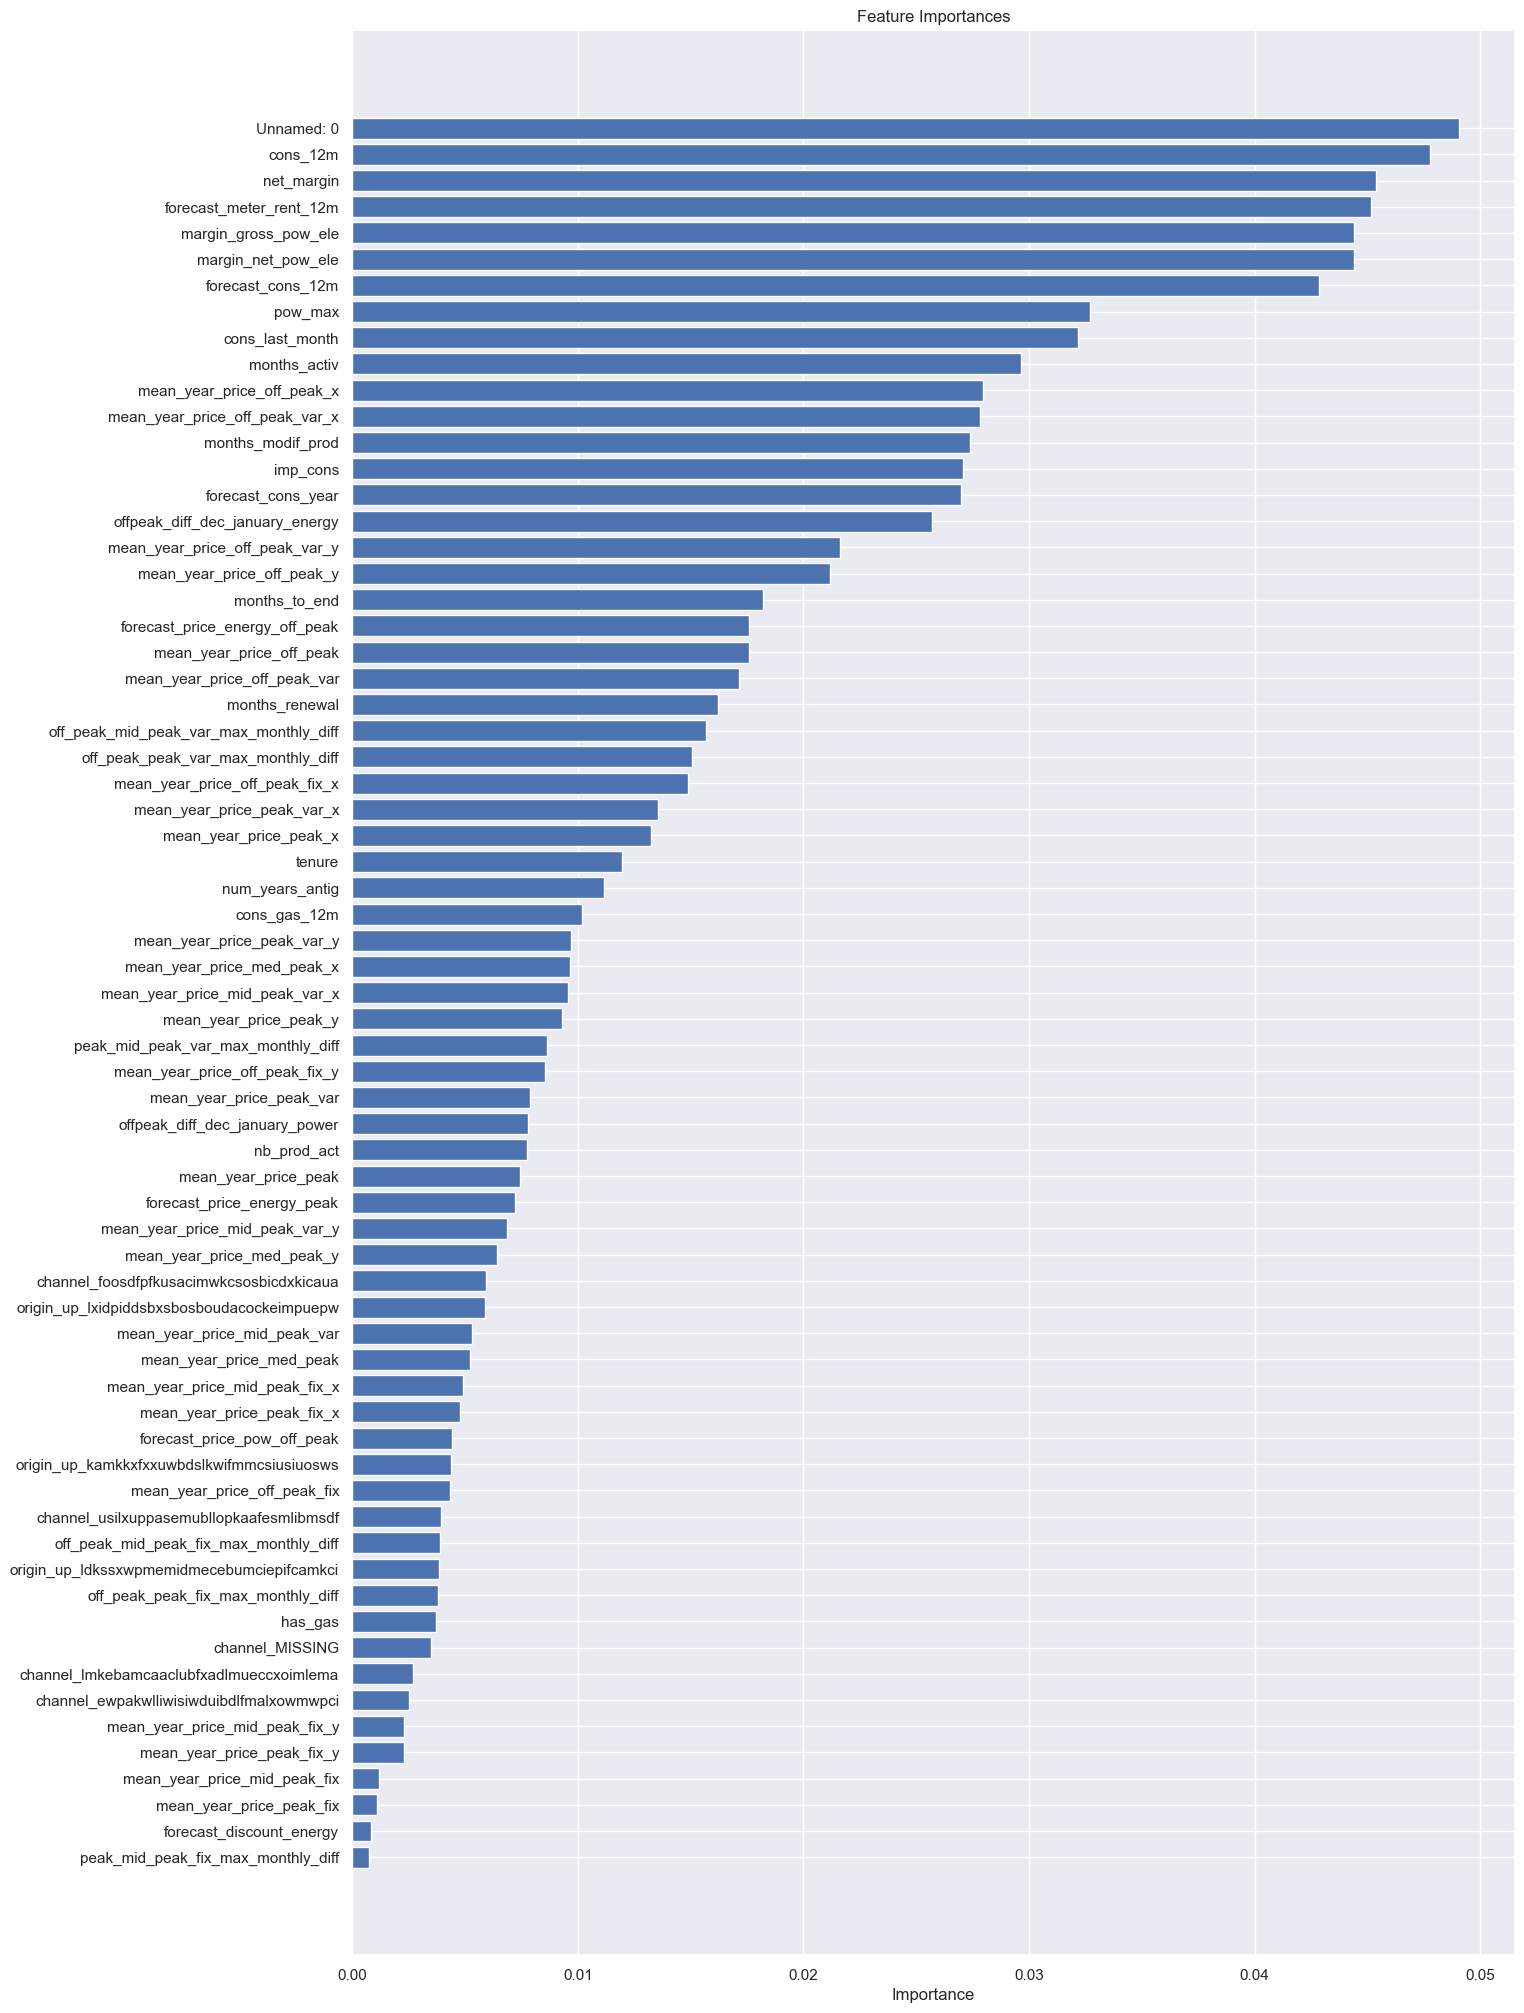

In [41]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
     

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [42]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [43]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)
     

In [44]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')